<a href="https://colab.research.google.com/github/sanujsriv/_topic_models/blob/FoTo/FoTo_Sentence_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Browsing to Local Directory
import os
os.chdir("C:/Users/sanuj/Documents/FoTo/")
!dir

In [ ]:
#@title function : load / save pickle_obj
import pickle

def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [ ]:
#@title Imports
import torch
import pandas as pd
from torch import nn
import re
from time import time
import numpy as np
import collections
from matplotlib import pyplot as plt
import torch.optim as optim
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [ ]:
#@title Download Stopwords , punkt, wordnet
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

In [ ]:
#@title Data Loading functions..
def load_reuters():
  data_preprocessed = load_obj('data_reuters_preprocessed')
  data_preprocessed_labels = load_obj("data_reuters_labels")
  embeddings = load_obj('embeddings_reuters')
  return data_preprocessed,data_preprocessed_labels,embeddings,load_reuters.__name__

def load_20News():
  embeddings = load_obj('embeddings_twentynews')
  # data_preprocessed = load_obj('data_twentynews_preprocessed')
  data_preprocessed = load_obj('fixed_data_twentynews_preprocessed')
  data_preprocessed_labels = load_obj("data_twentynews_labels")
  return data_preprocessed,data_preprocessed_labels,embeddings,load_20News.__name__

def load_20News_sentences():
  embeddings = load_obj('embeddings_twentynews_sent')
  data_preprocessed = load_obj('data_twentynews_preprocessed_sent')
  data_preprocessed_labels = load_obj("data_twentynews_labels_sent")
  doc_sent_id = load_obj('doc_id_sent_twentynews')
  return data_preprocessed,data_preprocessed_labels,embeddings,doc_sent_id,load_20News_sentences.__name__

def load_20News_reuters():
  data_preprocessed = load_obj('data_reuters_preprocessed')
  data_preprocessed_labels = load_obj("data_reuters_labels")
  embeddings = load_obj('embeddings_reuters')
  data_preprocessed.extend(load_obj('data_20News_preprocessed'))
  data_preprocessed_labels.extend(load_obj("data_20news_preprocessed_labels"))
  embeddings.update(load_obj('embeddings_20news'))
  return data_preprocessed,data_preprocessed_labels,embeddings,load_20News_reuters.__name__

def load_r52():
  data_preprocessed = load_obj('data_r52_preprocessed')
  data_preprocessed_labels = load_obj("data_r52_labels")
  embeddings = load_obj('embeddings_r52')
  return data_preprocessed,data_preprocessed_labels,embeddings,load_r52.__name__

def load_WebKb():
  data_preprocessed = load_obj('data_webkb_preprocessed')
  data_preprocessed_labels = load_obj("data_webkb_labels")
  embeddings = load_obj('embeddings_webkb')
  return data_preprocessed,data_preprocessed_labels,embeddings,load_WebKb.__name__

def load_WoS():
  data_preprocessed = load_obj('data_wos_preprocessed')
  data_preprocessed_labels = load_obj("data_wos_labels")
  embeddings = load_obj('embeddings_wos')
  return data_preprocessed,data_preprocessed_labels,embeddings,load_WoS.__name__
def load_arXiv():
  data_preprocessed = load_obj('data_arxiv_preprocessed')
  data_preprocessed_labels = load_obj("data_arxiv_labels")
  embeddings = load_obj('embeddings_arxiv')
  return data_preprocessed,data_preprocessed_labels,embeddings,load_arXiv.__name__

In [ ]:
# Local
from gensim import models
word2vec_model = models.KeyedVectors.load_word2vec_format(
    'C:/Users/sanuj/Documents/FoTo/GoogleNews-vectors-negative300.bin/GoogleNews-vectors-negative300.bin', binary=True)
# print('Cell took %.2f seconds to run.' % (time() - start))

C:\Users\sanuj\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
loaded_data = load_20News_sentences
data_preprocessed , data_preprocessed_labels , embeddings, doc_sent_id, name = loaded_data()
data_preprocessed_docs , data_preprocessed_labels_docs , embeddings_docs,doc_fn_name = load_20News()

In [ ]:
doc_id_array = np.array(doc_sent_id)

In [ ]:
output,counts = torch.unique(torch.from_numpy(doc_id_array) , return_counts=True)
doc_id_val,doc_id_indices =  torch.sort(counts,descending=True)

In [ ]:
output,counts

(tensor([    1,     2,     3,  ..., 18246, 18247, 18248], dtype=torch.int32),
 tensor([ 9,  3,  7,  ...,  6,  4, 12]))

(array([75., 59., 44., 26., 17.]),
 array([ 50,  60,  70,  80,  90, 100]),
 <a list of 5 Patch objects>)

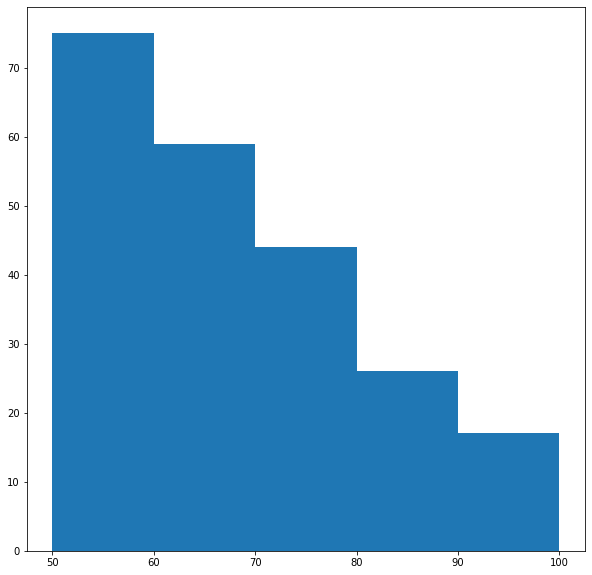

In [ ]:
# plt.hist(np.log2(doc_id_val.numpy()))
plt.figure(figsize=(10,10))
plt.hist(doc_id_val.numpy(), bins=[50, 60, 70, 80, 90, 100])

In [ ]:
doc_id_val,doc_id_indices

(tensor([682, 661, 654,  ...,   1,   1,   1]),
 tensor([13550,  9378, 16467,  ..., 11564,  8191, 16675]))

In [ ]:
list_doc_id_val = doc_id_val.tolist()

In [ ]:
list_doc_id_ndx = doc_id_indices.tolist()

In [ ]:
sent100_ndx = list_doc_id_val.index(50)

In [ ]:
list_doc_id_ndx = list_doc_id_ndx[sent100_ndx:]

In [ ]:
len(list_doc_id_ndx[::-1])

17895

In [ ]:
data_preprocessed_wdot, data_preprocessed_labels_wdot = load_obj('data_preprocessed_wdot'),load_obj('data_preprocessed_labels_wdot')

In [ ]:
len(data_preprocessed_wdot),len(data_preprocessed_labels_wdot)

(18248, 18248)

In [ ]:
new_data =[]
new_labels = []
for i in list_doc_id_ndx[::-1]:
  # print(i)
  new_data.append(data_preprocessed_wdot[i])
  new_labels.append(data_preprocessed_labels_wdot[i])

In [ ]:
k=16625
# data_preprocessed_wdot[k],data_preprocessed_labels_wdot[k]
new_data[k],new_labels[k]

('general rule relay will cleanly switch audio tranfer circuit contact . noise hear momentary opening closing path . noiseless transfering audio ground circuit . high impedance audio circuit resistive t constructed close characteristic impedance circuit . grounding imputs connected t transfer audio . low impedance circuit transformer input shorted grounded . secondary paralleled characteristic impedance . switch audio second contact momentarily short circuit output duration switching time . telephone relay handy contact adjusted break versa havent year . switching electronically op amp . novel circuit build wa primitive optical consists resistive photocell lamp packaged tube . lamp cell high resistance . turn lamp resistance lower passing audio . device t switch audio . varying lamp resistance remote volume control . variable resister mixer lot luck tom tom wagner audio visual technician . college british columbia loc kentucky rifle snail mail site q4 c2 . british columbia canada',
 's

In [ ]:
stopwords = ['would','know','dont','get','like','think','im',"also","said","a", "able", "about", "above", "abst", "accordance", "according", "accordingly", "across", "act", "actually", "added", "adj", "affected", "affecting", "affects", "after", "afterwards", "again", "against", "ah", "all", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "apparently", "approximately", "are", "aren", "arent", "arise", "around", "as", "aside", "ask", "asking", "at", "auth", "available", "away", "awfully", "b", "back", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "between", "beyond", "biol", "both", "brief", "briefly", "but", "by", "c", "ca", "came", "can", "cannot", "can't", "cause", "causes", "certain", "certainly", "co", "com", "come", "comes", "contain", "containing", "contains", "could", "couldnt", "d", "date", "did", "didn't", "different", "do", "does", "doesn't", "doing", "done", "don't", "down", "downwards", "due", "during", "e", "each", "ed", "edu", "effect", "eg", "eight", "eighty", "either", "else", "elsewhere", "end", "ending", "enough", "especially", "et", "et-al", "etc", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "except", "f", "far", "few", "ff", "fifth", "first", "five", "fix", "followed", "following", "follows", "for", "former", "formerly", "forth", "found", "four", "from", "further", "furthermore", "g", "gave", "get", "gets", "getting", "give", "given", "gives", "giving", "go", "goes", "gone", "got", "gotten", "h", "had", "happens", "hardly", "has", "hasn't", "have", "haven't", "having", "he", "hed", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "hereupon", "hers", "herself", "hes", "hi", "hid", "him", "himself", "his", "hither", "home", "how", "howbeit", "however", "hundred", "i", "id", "ie", "if", "i'll", "im", "immediate", "immediately", "importance", "important", "in", "inc", "indeed", "index", "information", "instead", "into", "invention", "inward", "is", "isn't", "it", "itd", "it'll", "its", "itself", "i've", "j", "just", "k", "keep  keeps", "kept", "kg", "km", "know", "known", "knows", "l", "largely", "last", "lately", "later", "latter", "latterly", "least", "less", "lest", "let", "lets", "like", "liked", "likely", "line", "little", "'ll", "look", "looking", "looks", "ltd", "m", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "million", "miss", "ml", "more", "moreover", "most", "mostly", "mr", "mrs", "much", "mug", "must", "my", "myself", "n", "na", "name", "namely", "nay", "nd", "near", "nearly", "necessarily", "necessary", "need", "needs", "neither", "never", "nevertheless", "new", "next", "nine", "ninety", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "now", "nowhere", "o", "obtain", "obtained", "obviously", "of", "off", "often", "oh", "ok", "okay", "old", "omitted", "on", "once", "one", "ones", "only", "onto", "or", "ord", "other", "others", "otherwise", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "owing", "own", "p", "page", "pages", "part", "particular", "particularly", "past", "per", "perhaps", "placed", "please", "plus", "poorly", "possible", "possibly", "potentially", "pp", "predominantly", "present", "previously", "primarily", "probably", "promptly", "proud", "provides", "put", "q", "que", "quickly", "quite", "qv", "r", "ran", "rather", "rd", "re", "readily", "really", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "respectively", "resulted", "resulting", "results", "right", "run", "s", "said", "same", "saw", "say", "saying", "says", "sec", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sent", "seven", "several", "shall", "she", "shed", "she'll", "shes", "should", "shouldn't", "show", "showed", "shown", "showns", "shows", "significant", "significantly", "similar", "similarly", "since", "six", "slightly", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "specifically", "specified", "specify", "specifying", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure    t", "take", "taken", "taking", "tell", "tends", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'll", "theyre", "they've", "think", "this", "those", "thou", "though", "thoughh", "thousand", "throug", "through", "throughout", "thru", "thus", "til", "tip", "to", "together", "too", "took", "toward", "towards", "tried", "tries", "truly", "try", "trying", "ts", "twice", "two", "u", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "up", "upon", "ups", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "v", "value", "various", "'ve", "very", "via", "viz", "vol", "vols", "vs", "w", "want", "wants", "was", "wasnt", "way", "we", "wed", "welcome", "we'll", "went", "were", "werent", "we've", "what", "whatever", "what'll", "whats", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "whose", "why", "widely", "willing", "wish", "with", "within", "without", "wont", "words", "world", "would", "wouldnt", "www", "x", "y", "yes", "yet", "you", "youd", "you'll", "your", "youre", "yours", "yourself", "yourselves", "you've", "z", "zero"]

def docs_to_sentence(data_preprocessed,data_preprocessed_labels):
  data_preprocessed_labels_sentence = []
  data_preprocessed_sentence = []
  doc_id_sent = []

  for i in range(len(data_preprocessed)):
    s = data_preprocessed[i].split('.')
    for j in s:
      j= j.split()
      j = filter(lambda x:x not in stopwords, j)
      j = ' '.join([e for e in j])
      if (j!=''):
        data_preprocessed_sentence.append(j)
        data_preprocessed_labels_sentence.append(data_preprocessed_labels[i])
        doc_id_sent.append(i)

  return data_preprocessed_sentence,data_preprocessed_labels_sentence,doc_id_sent

In [ ]:
data_preprocessed_sentence_w,data_preprocessed_labels_sentence_w,doc_id_sent_w = docs_to_sentence(new_data,new_labels)

In [ ]:
len(data_preprocessed_sentence_w),len(data_preprocessed_labels_sentence_w),len(doc_id_sent_w)

(121453, 121453, 121453)

In [ ]:
new_data[17894]

'tony read post wa antigay sentimental literature . gay people will con tinue persecuted long propaganda . unaware finding concerning published group reenforce bias . kkk instance group . course vast majority public scoff finding document today wa case . fortunately white supported public sentiment wa eventually entirely turned . wa civil war sentiment increased . fact law place protect inalienable black wa pretty legal discriminate . gay will turn free form discrimination . deceived perogative . church christian church disciple christ openly affirms oppressed people segment society including gay . gospel message preaching creation making disciple . lord great commandment love beleive standing oppressed popular . church reason . find church valley stand gospel belief commandment love hardpressed find sho love champion oppressed community . lost face greater christian community unpopularity belief abolitionist oppression . killed treated runaway slave . guess ive decided challenge worth

In [ ]:
doc_id_sent_w.count(doc_id_sent_w[-1])

50

In [ ]:
doc_id_count = []
for i in set(doc_id_sent_w):
  doc_id_count.append(doc_id_sent_w.count(i))

In [ ]:
max(doc_id_count),doc_id_count.index(max(doc_id_count))+1

(50, 17889)

In [ ]:
doc_id_array = np.array(doc_id_sent_w)

In [ ]:
max(doc_id_sent_w)

17894

In [ ]:
output,counts = torch.unique(torch.from_numpy(doc_id_array) , return_counts=True)
doc_id_val,doc_id_indices =  torch.sort(counts,descending=True)

(array([10538.,  4223.,  1516.,   650.,   359.,   226.,   143.,   112.,
           75.,    53.]),
 array([ 1. ,  5.9, 10.8, 15.7, 20.6, 25.5, 30.4, 35.3, 40.2, 45.1, 50. ]),
 <a list of 10 Patch objects>)

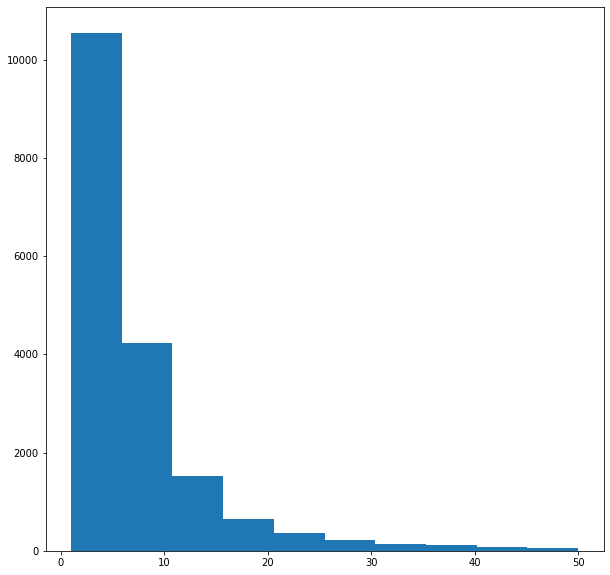

In [ ]:
from matplotlib import pyplot as plt
# plt.hist(numpy.log2(doc_id_val.numpy()))
plt.figure(figsize=(10,10))
plt.hist(doc_id_val.numpy())

In [ ]:
save_obj(doc_id_sent_w,'50_doc_id_sent_'+loaded_data.__name__)

In [ ]:
save_obj(data_preprocessed_sentence_w, '50_data_'+loaded_data.__name__+'_preprocessed_sent')
save_obj(data_preprocessed_labels_sentence_w,'50_data_'+loaded_data.__name__+'_labels_sent')

In [ ]:
doc_id = load_obj('50_doc_id_sent_load_20News_sentences')

In [ ]:
doc_id[-1]

17894

In [ ]:
data_preprocessed_sentence_w

In [ ]:
new_data

In [ ]:
for n in range(len(new_data)):
  new_data[n]=new_data[n].replace(".","")

In [ ]:
len(new_data)

17895

In [ ]:
def doc_to_words(doc):
  word_list=[]
  for i in doc:
    words = i.split()
    word_list.append([w for w in words if w not in stopwords and w!=''])
  return word_list
all_new = doc_to_words(new_data)

In [ ]:
vectorizer = CountVectorizer(max_features=5000)
fit_data=vectorizer.fit_transform(new_data).toarray()
len(vectorizer.vocabulary_.keys())

5000

In [ ]:
len(all_new)

17895

In [ ]:
def flatten_list(user_list):
  return [item for sublist in user_list for item in sublist]
flatten_all_new = flatten_list(all_new)

In [ ]:
len(set(flatten_all_new))

35256

In [ ]:
len(all_new),len(flatten_all_new)

(17895, 900567)

In [ ]:
count=0
embeddings = {}

for f in flatten_all_new:
  try :
     embeddings[f] = word2vec_model[f]
  except KeyError:
    print(f)
    count = count+1
print( count / len(flatten_all_new)*100)

0.0


In [ ]:
remove_words = ['etcetc','sgicom','fbigov','applecom','suncom']

for d in range(len(new_data)):
  dwords = new_data[d].split()
  resultwords  = [word for word in dwords if word.lower() not in remove_words and word.lower() not in stopwords]
  result = ' '.join(resultwords)
  new_data[d] = result

In [ ]:
save_obj(new_data, '50_data_'+loaded_data.__name__+'_preprocessed')
# save_obj(new_labels,'50_data_'+loaded_data.__name__+'_labels')

In [ ]:
save_obj(embeddings,'50_embeddings_'+loaded_data.__name__+'docs')